### Insurance Claim Prediction: CART-RF-ANN

In [80]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [238]:
ins = pd.read_csv("insurance_part2_data.csv")

In [239]:
ins.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [83]:
ins.shape

(3000, 10)

In [84]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [240]:
ins = ins.rename(columns = {"Product Name":"Product_Name"})

In [86]:
ins.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product_Name    0
Destination     0
dtype: int64

# Check for Duplicate records

In [87]:
# Check for duplicate data

dups = ins.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

ins[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


**Since we have 139 duplicate records in the data, we will remove this from the data set so that we get only distinct records.**

In [88]:
139/3000

0.04633333333333333

In [241]:
ins.drop_duplicates(inplace=True)

**Post removing the duplicate, we will check whether the duplicates has been removed from the data set or not.**

In [90]:
dups = ins.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [91]:
ins.describe().round(2)

,Age,Commision,Duration,Sales
count,2861.00,2861.00,2861.00,2861.00
mean,38.20,15.08,72.12,61.76
std,10.68,25.83,135.98,71.40
min,8.00,0.00,-1.00,0.00
25%,31.00,0.00,12.00,20.00
50%,36.00,5.63,28.00,33.50
75%,43.00,17.82,66.00,69.30
max,84.00,210.21,4580.00,539.00


## Checking pairwise distribution of the continuous variables

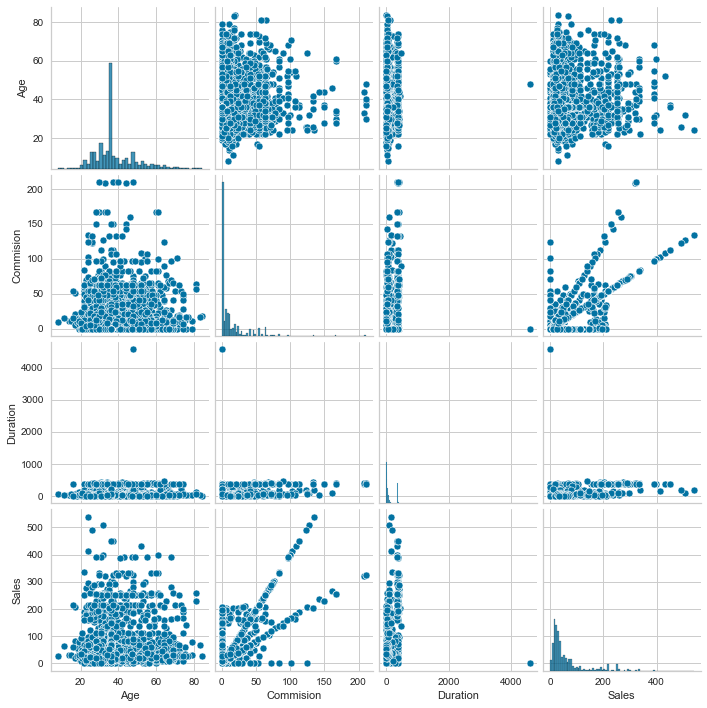

In [93]:
sns.pairplot(ins[['Age', 'Commision', 'Duration', 'Sales']])

## Checking for Correlations

<AxesSubplot:>

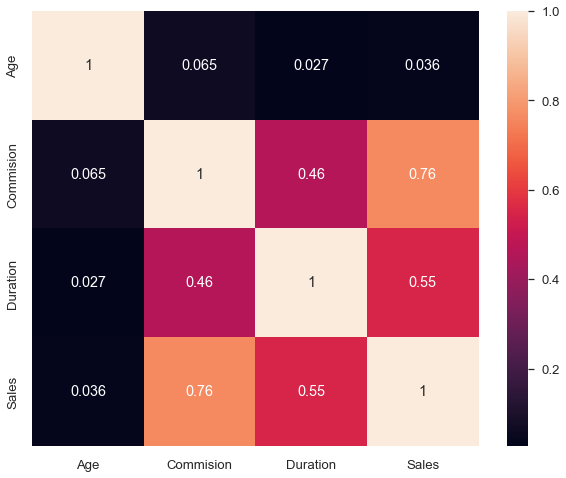

In [94]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(ins[['Age', 'Commision', 'Duration', 'Sales']].corr(), annot=True)

## Converting all objects to categorical codes

In [242]:
print('Age \n',ins.Age.value_counts())
print('\n')
print('Agency_Code \n',ins.Agency_Code.value_counts())
print('\n')
print('Type \n',ins.Type.value_counts())
print('\n')
print('Claimed \n',ins.Claimed.value_counts())
print('\n')
print('Channel \n',ins.Channel.value_counts())
print('\n')
print('Product_Name \n',ins.Product_Name.value_counts())
print('\n')
print('Destination \n',ins.Destination.value_counts())

Age 
 36    880
31    124
48    107
30     91
35     91
     ... 
8       1
84      1
83      1
15      1
11      1
Name: Age, Length: 70, dtype: int64


Agency_Code 
 EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64


Type 
 Travel Agency    1709
Airlines         1152
Name: Type, dtype: int64


Claimed 
 No     1947
Yes     914
Name: Claimed, dtype: int64


Channel 
 Online     2815
Offline      46
Name: Channel, dtype: int64


Product_Name 
 Customised Plan      1071
Bronze Plan           645
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: Product_Name, dtype: int64


Destination 
 ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64


In [243]:
## Converting Object into int
## Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types.
for feature in ins.columns: 
    if ins[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(ins[feature].unique()))
        print(pd.Categorical(ins[feature].unique()).codes)
        ins[feature] = pd.Categorical(ins[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product_Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [244]:
print('Age \n',ins.Age.value_counts())
print('\n')
print('Agency_Code \n',ins.Agency_Code.value_counts())
print('\n')
print('Type \n',ins.Type.value_counts())
print('\n')
print('Claimed \n',ins.Claimed.value_counts())
print('\n')
print('Channel \n',ins.Channel.value_counts())
print('\n')
print('Product_Name \n',ins.Product_Name.value_counts())
print('\n')
print('Destination \n',ins.Destination.value_counts())

Age 
 36    880
31    124
48    107
30     91
35     91
     ... 
8       1
84      1
83      1
15      1
11      1
Name: Age, Length: 70, dtype: int64


Agency_Code 
 2    1238
0     913
1     471
3     239
Name: Agency_Code, dtype: int64


Type 
 1    1709
0    1152
Name: Type, dtype: int64


Claimed 
 0    1947
1     914
Name: Claimed, dtype: int64


Channel 
 1    2815
0      46
Name: Channel, dtype: int64


Product_Name 
 2    1071
0     645
1     615
4     421
3     109
Name: Product_Name, dtype: int64


Destination 
 0    2327
1     319
2     215
Name: Destination, dtype: int64


In [98]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product_Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 193.1 KB


In [99]:
ins.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


Label Encoding has been done and all columns are converted to number

### EDA

### Univariate Analysis

Let us define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [100]:
lstnumericcolumns_1 = list(ins.columns.values)

In [101]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(ins[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.displot(ins[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=ins[column])
    plt.show()

Description of Age
----------------------------------------------------------------------------
count    2861.000000
mean       38.204124
std        10.678106
min         8.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        84.000000
Name: Age, dtype: float64 Distribution of Age
----------------------------------------------------------------------------


<Figure size 576x396 with 0 Axes>

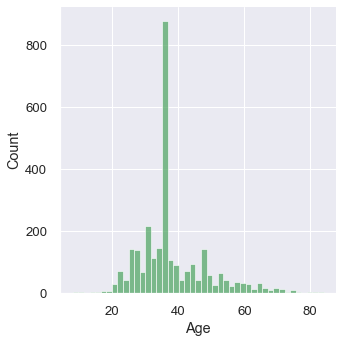

BoxPlot of Age
----------------------------------------------------------------------------


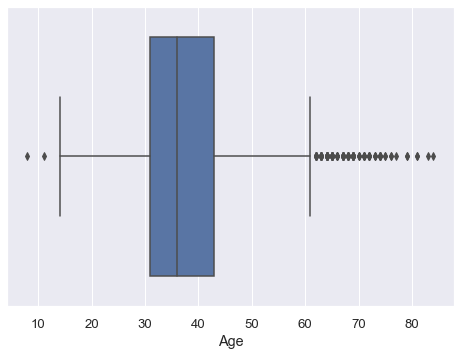

Description of Agency_Code
----------------------------------------------------------------------------
count    2861.000000
mean        1.280671
std         1.003773
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: Agency_Code, dtype: float64 Distribution of Agency_Code
----------------------------------------------------------------------------


<Figure size 576x396 with 0 Axes>

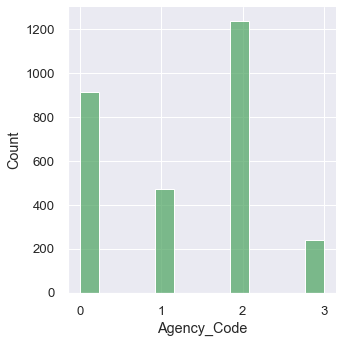

BoxPlot of Agency_Code
----------------------------------------------------------------------------


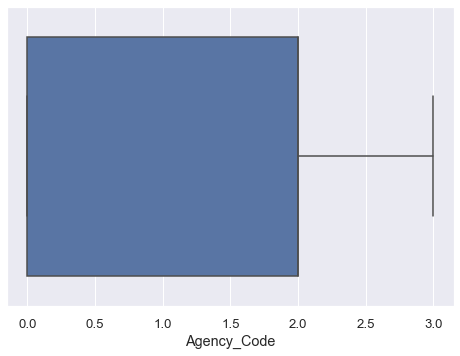

Description of Type
----------------------------------------------------------------------------
count    2861.000000
mean        0.597344
std         0.490518
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Type, dtype: float64 Distribution of Type
----------------------------------------------------------------------------


<Figure size 576x396 with 0 Axes>

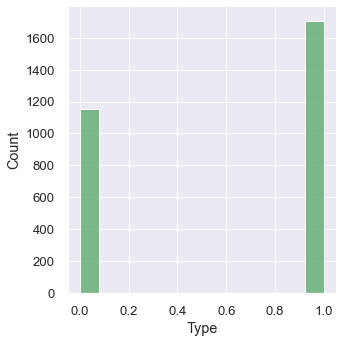

BoxPlot of Type
----------------------------------------------------------------------------


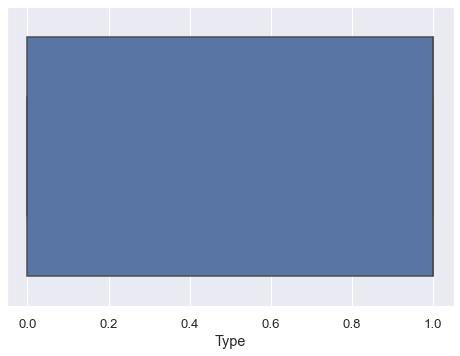

Description of Claimed
----------------------------------------------------------------------------
count    2861.000000
mean        0.319469
std         0.466352
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Claimed, dtype: float64 Distribution of Claimed
----------------------------------------------------------------------------


<Figure size 576x396 with 0 Axes>

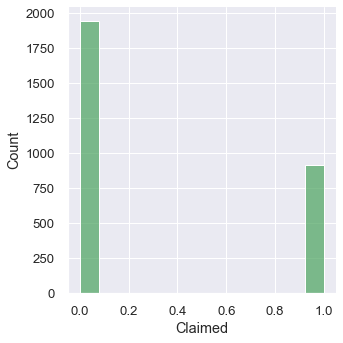

BoxPlot of Claimed
----------------------------------------------------------------------------


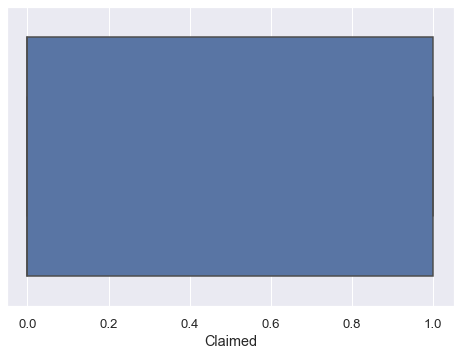

Description of Commision
----------------------------------------------------------------------------
count    2861.000000
mean       15.080996
std        25.826834
min         0.000000
25%         0.000000
50%         5.630000
75%        17.820000
max       210.210000
Name: Commision, dtype: float64 Distribution of Commision
----------------------------------------------------------------------------


<Figure size 576x396 with 0 Axes>

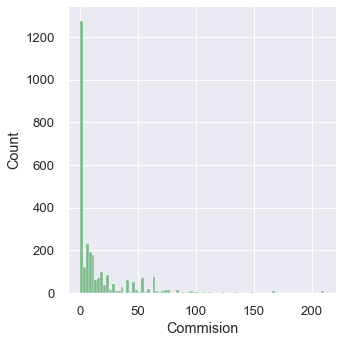

BoxPlot of Commision
----------------------------------------------------------------------------


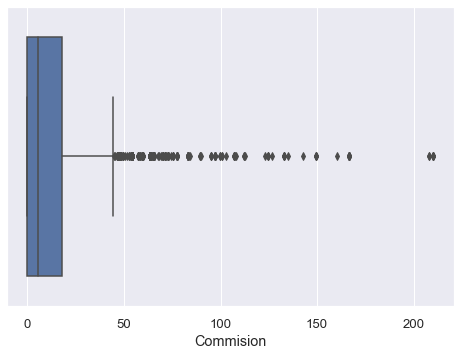

Description of Channel
----------------------------------------------------------------------------
count    2861.000000
mean        0.983922
std         0.125799
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Channel, dtype: float64 Distribution of Channel
----------------------------------------------------------------------------


<Figure size 576x396 with 0 Axes>

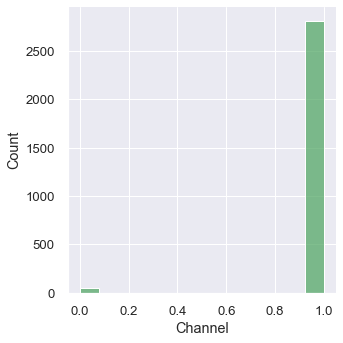

BoxPlot of Channel
----------------------------------------------------------------------------


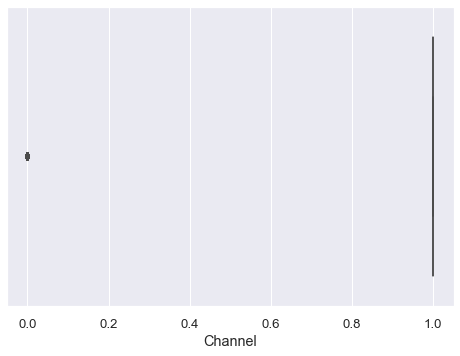

Description of Duration
----------------------------------------------------------------------------
count    2861.000000
mean       72.120238
std       135.977200
min        -1.000000
25%        12.000000
50%        28.000000
75%        66.000000
max      4580.000000
Name: Duration, dtype: float64 Distribution of Duration
----------------------------------------------------------------------------


<Figure size 576x396 with 0 Axes>

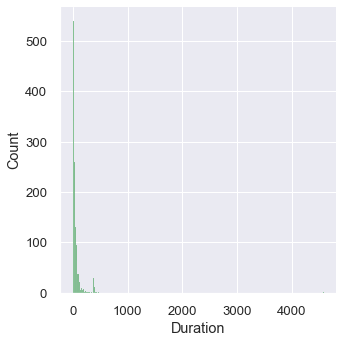

BoxPlot of Duration
----------------------------------------------------------------------------


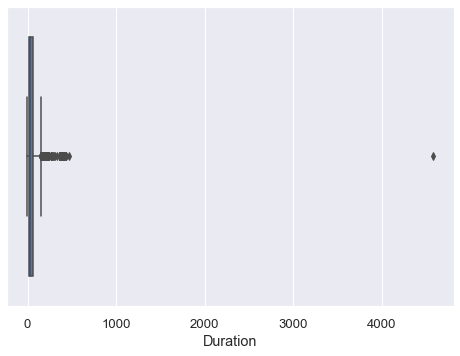

Description of Sales
----------------------------------------------------------------------------
count    2861.000000
mean       61.757878
std        71.399740
min         0.000000
25%        20.000000
50%        33.500000
75%        69.300000
max       539.000000
Name: Sales, dtype: float64 Distribution of Sales
----------------------------------------------------------------------------


<Figure size 576x396 with 0 Axes>

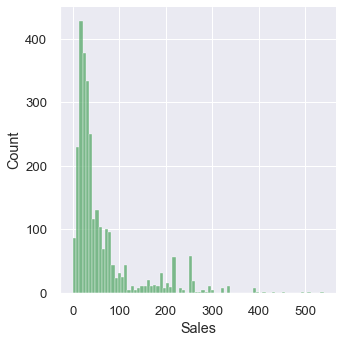

BoxPlot of Sales
----------------------------------------------------------------------------


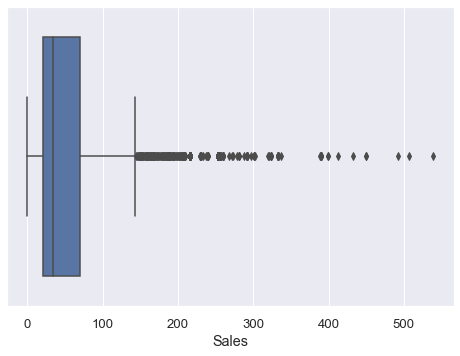

Description of Product_Name
----------------------------------------------------------------------------
count    2861.000000
mean        1.666550
std         1.277822
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Product_Name, dtype: float64 Distribution of Product_Name
----------------------------------------------------------------------------


<Figure size 576x396 with 0 Axes>

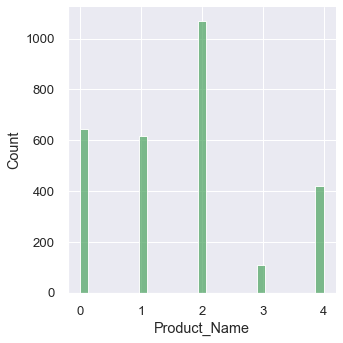

BoxPlot of Product_Name
----------------------------------------------------------------------------


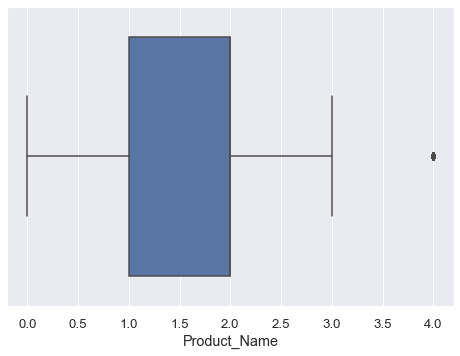

Description of Destination
----------------------------------------------------------------------------
count    2861.000000
mean        0.261797
std         0.586239
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: Destination, dtype: float64 Distribution of Destination
----------------------------------------------------------------------------


<Figure size 576x396 with 0 Axes>

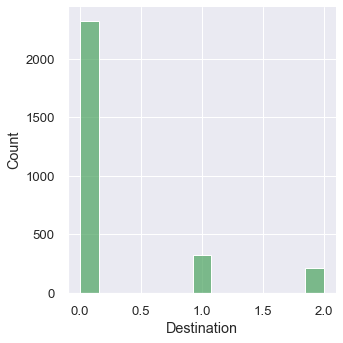

BoxPlot of Destination
----------------------------------------------------------------------------


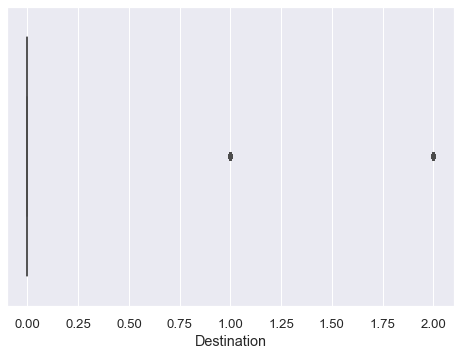

In [102]:
for x in lstnumericcolumns_1:
    univariateAnalysis_numeric(x,20)

# Multivariate Analysis

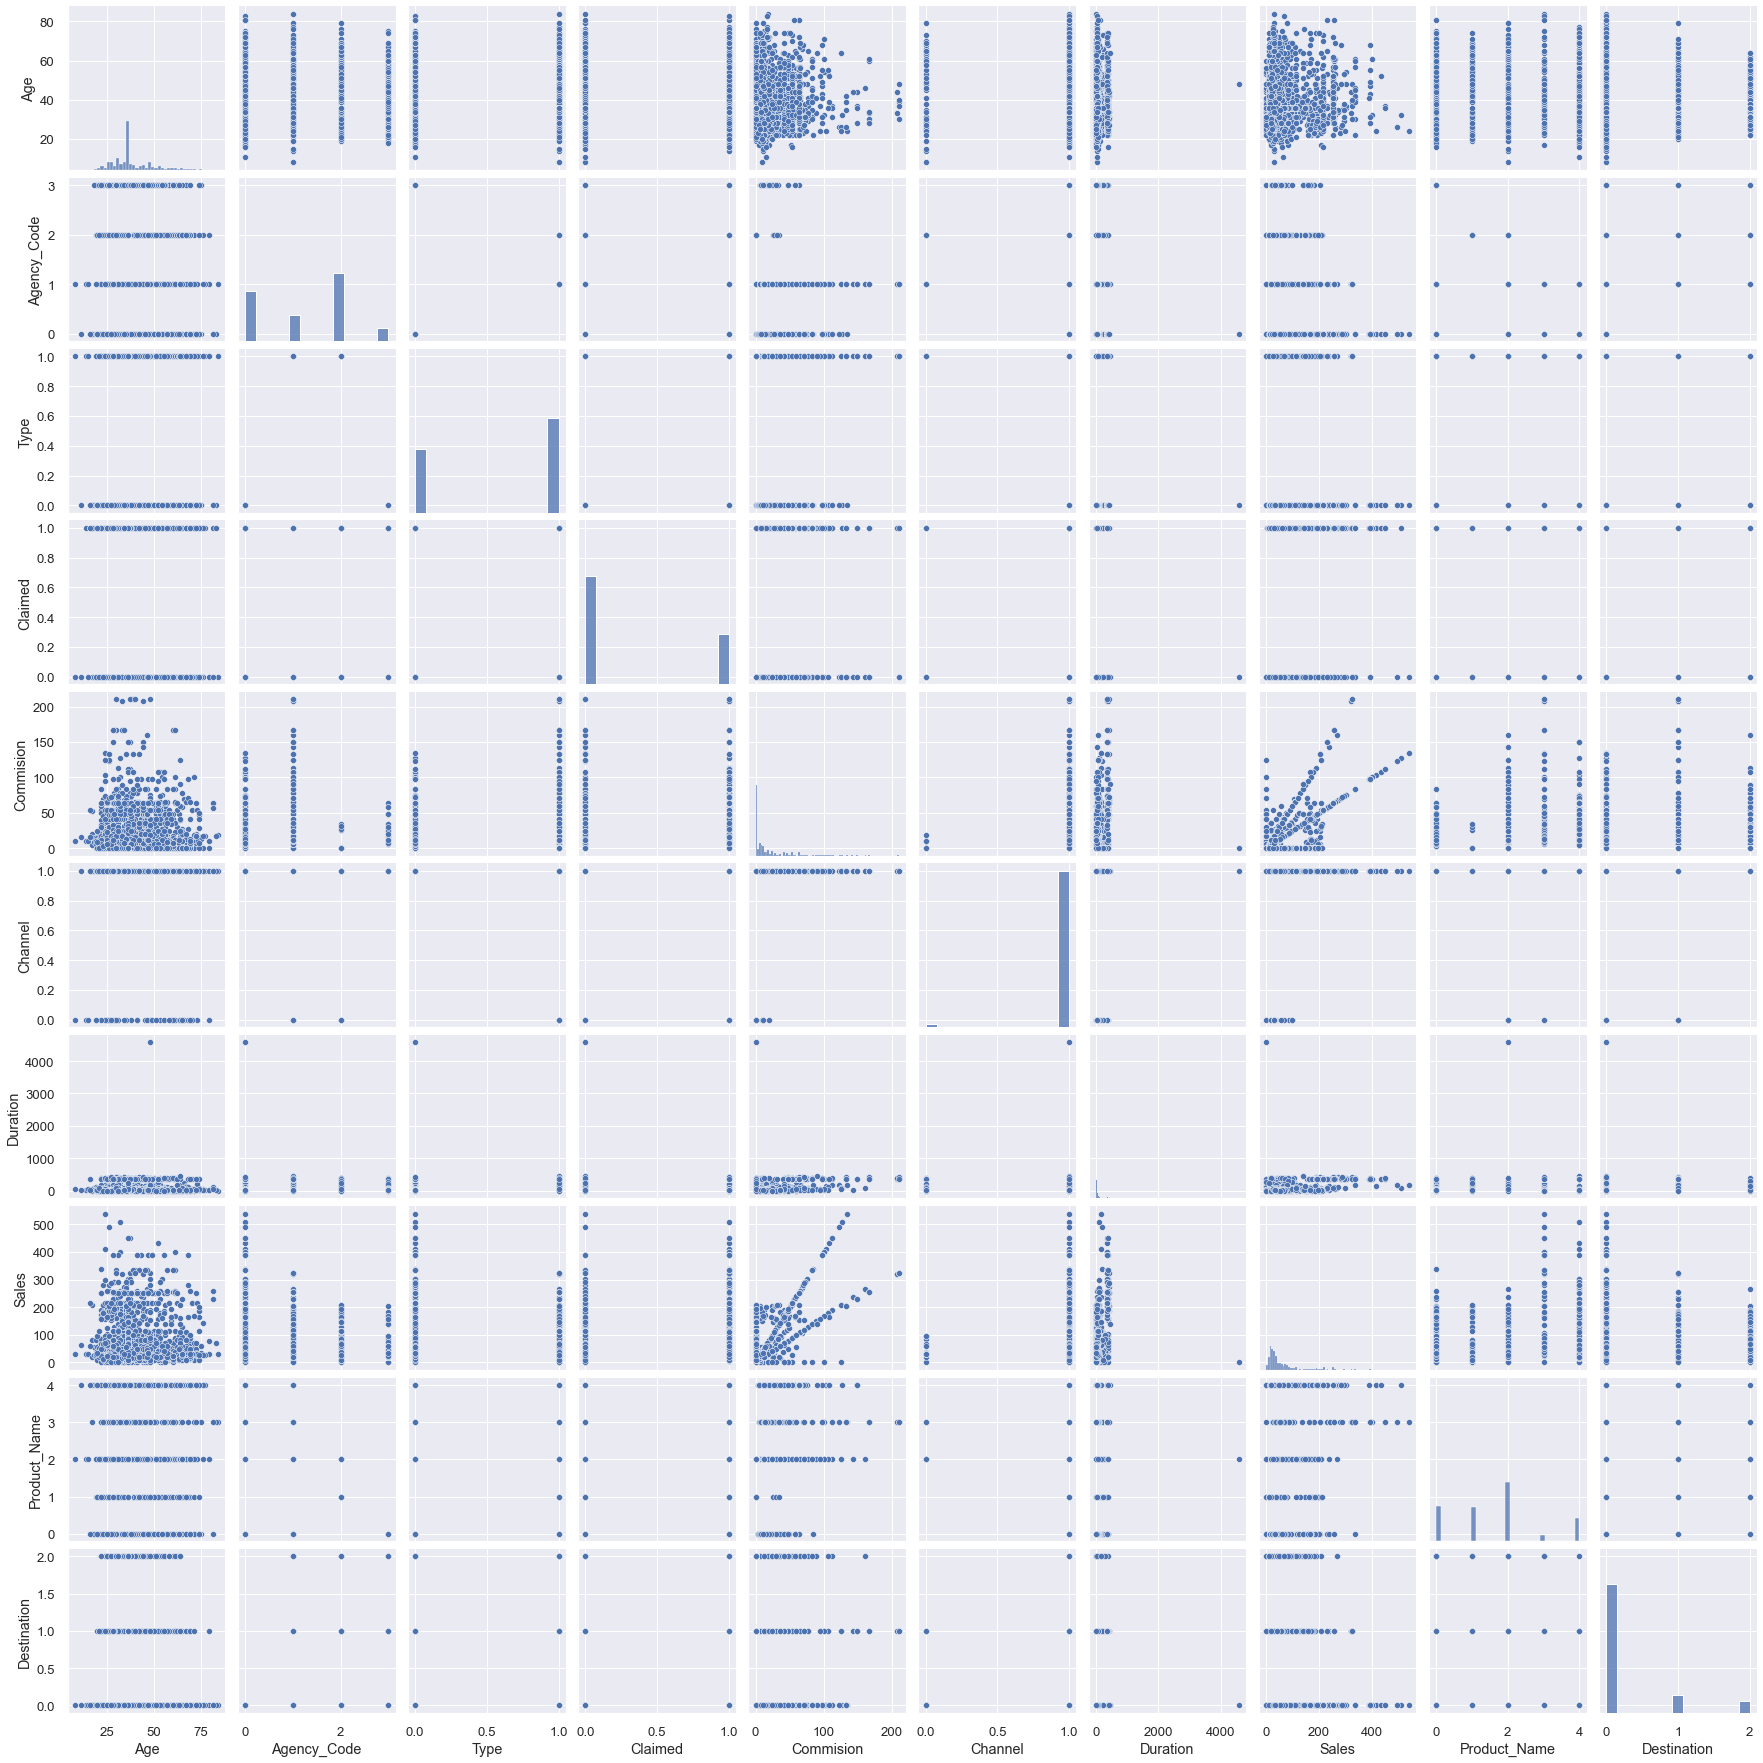

In [103]:
sns.pairplot(ins)

[Text(0, 0, '1947'), Text(0, 0, '914')]

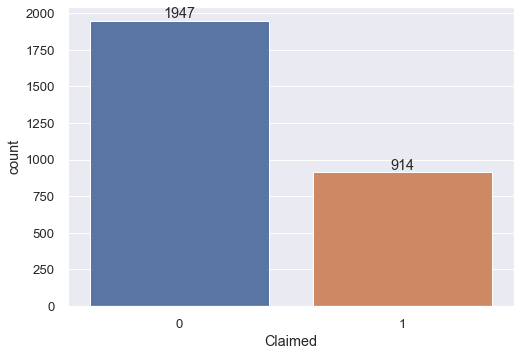

In [104]:
ax = sns.countplot(x = 'Claimed', data = ins)
abs_values = ins['Claimed'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

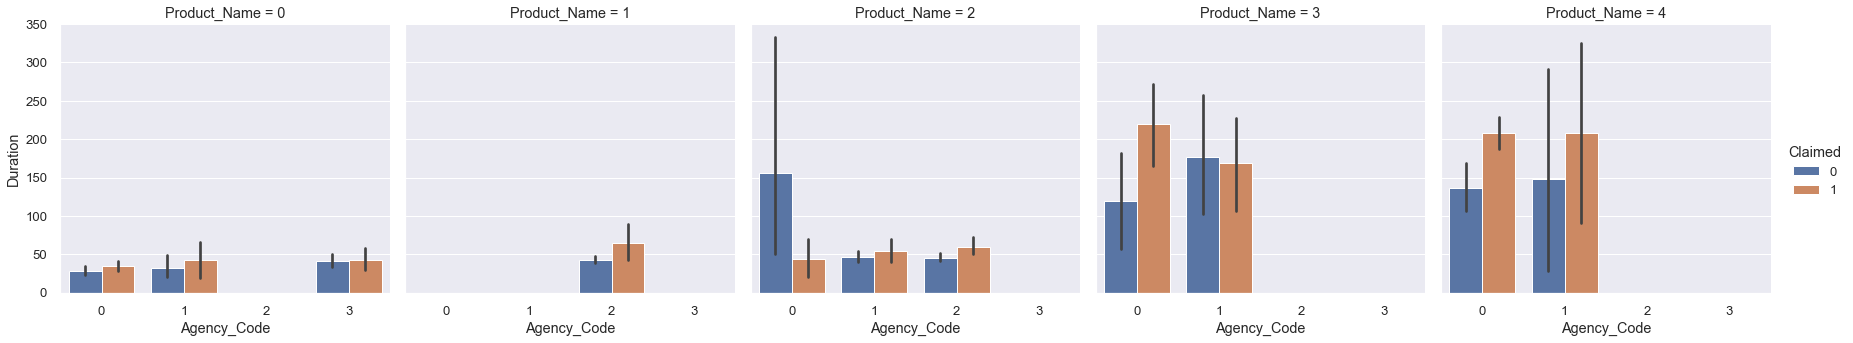

In [105]:
sns.catplot(x='Agency_Code',
           y = 'Duration',
           hue = 'Claimed',
           col = 'Product_Name',
           data = ins,
           kind ='bar');

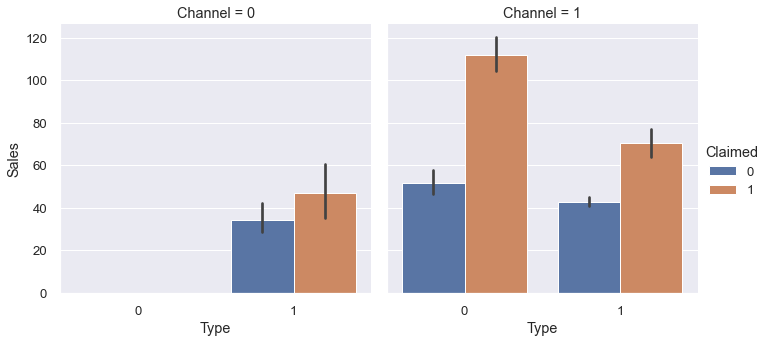

In [106]:
sns.catplot(x='Type',
           y = 'Sales',
           hue = 'Claimed',
           col = 'Channel',
           data = ins,
           kind ='bar');

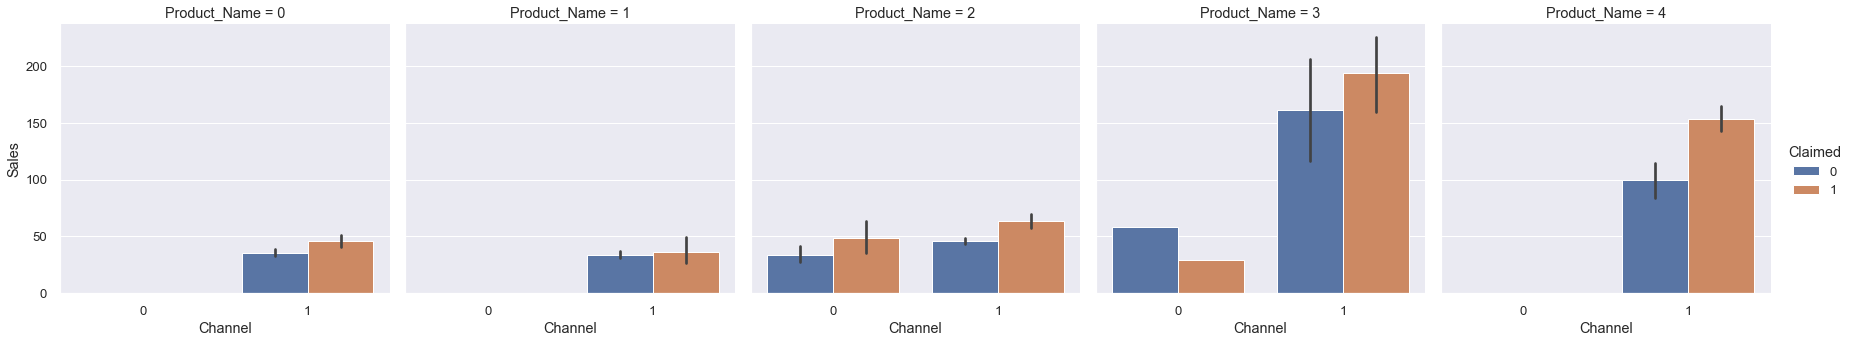

In [107]:
sns.catplot(x='Channel',
           y = 'Sales',
           hue = 'Claimed',
           col = 'Product_Name',
           data = ins,
           kind ='bar');

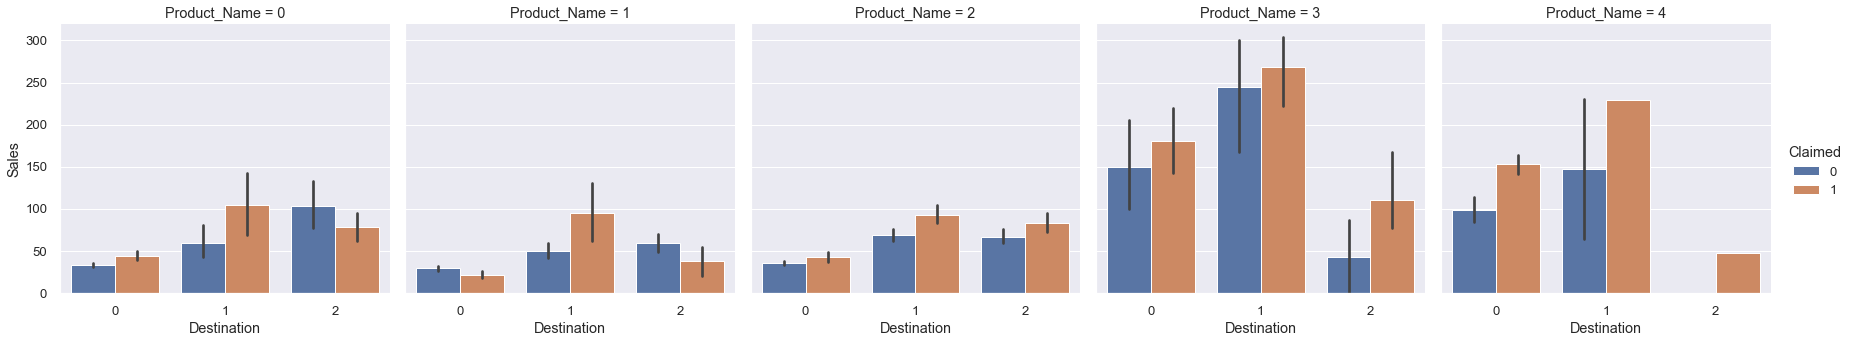

In [245]:
sns.catplot(x='Destination',
           y = 'Sales',
           hue = 'Claimed',
           col = 'Product_Name',
           data = ins,
           kind ='bar');

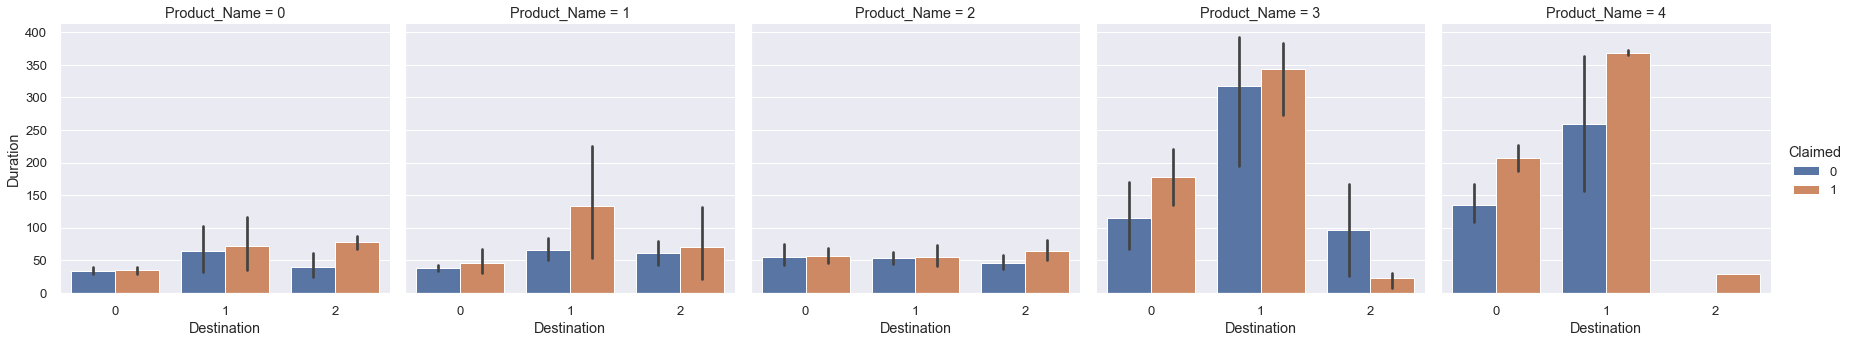

In [246]:
sns.catplot(x='Destination',
           y = 'Duration',
           hue = 'Claimed',
           col = 'Product_Name',
           data = ins,
           kind ='bar');

## Correlation Heatmap

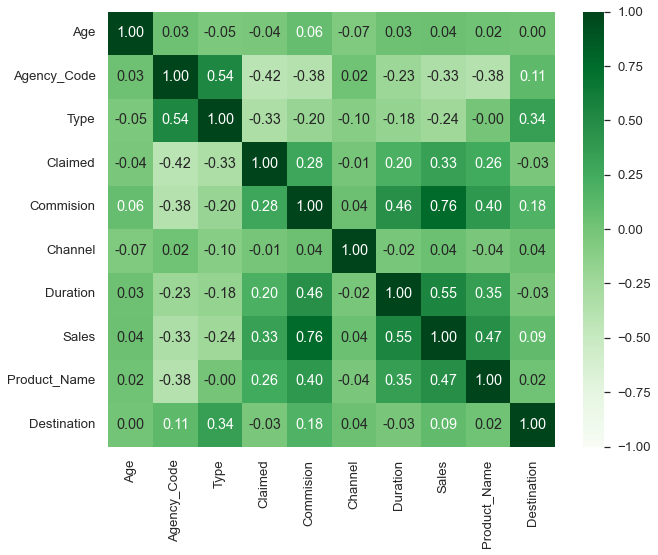

In [108]:
plt.figure(figsize=(10,8))
sns.heatmap(ins.corr(), annot=True, fmt='.2f', cmap='Greens',vmin =-1, vmax =1)
plt.show()

### Proportion of 1s and 0s

In [109]:
ins.Claimed.value_counts(normalize =True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

We have an imbalanced dataset as the percentage of Claimed observations is only 32% and Not Claimed is 68%

### Extracting the target column into separate vectors for training set and test set

In [110]:
X = ins.drop("Claimed", axis=1, inplace=False)

y = ins.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [111]:
y.tail()

2995    1
2996    0
2997    0
2998    1
2999    0
Name: Claimed, dtype: int8

### Splitting data into training and test set

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

### Checking the dimensions of the training and test data

In [113]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',2002+859)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)
Total Obs 2861


# Building a Decision Tree Classifier

In [114]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 5)

In [115]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 300}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=300,
                       random_state=1)

## Generating Tree

In [116]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

http://webgraphviz.com/

## Variable Importance

In [117]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.600450
Sales         0.304966
Product_Name  0.047357
Duration      0.018764
Commision     0.014732
Age           0.013731
Type          0.000000
Channel       0.000000
Destination   0.000000


## Predicting on Training and Test dataset

In [118]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## Getting the Predicted Classes and Probs

In [119]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.573171,0.426829
1,0.971223,0.028777
2,0.232975,0.767025
3,0.837500,0.162500
4,0.837500,0.162500


## Model Evaluation

### AUC and ROC for the training data

AUC: 0.810


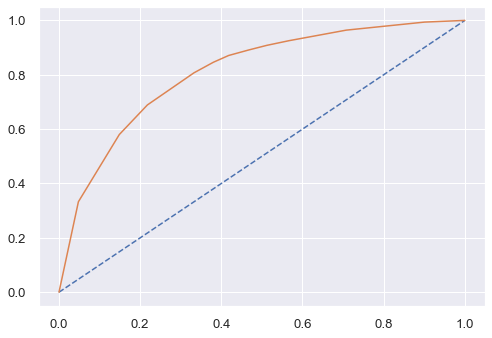

In [120]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

### AUC and ROC for the test data

AUC: 0.792


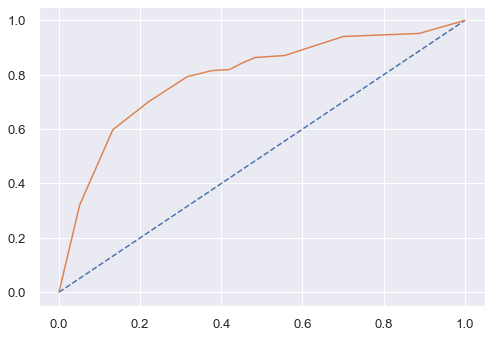

In [121]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Confusion Matrix for the training data

In [122]:
confusion_matrix(train_labels, ytrain_predict)

array([[1157,  202],
       [ 270,  373]], dtype=int64)

In [123]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7642357642357642

In [124]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1359
           1       0.65      0.58      0.61       643

    accuracy                           0.76      2002
   macro avg       0.73      0.72      0.72      2002
weighted avg       0.76      0.76      0.76      2002



In [125]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.65
cart_train_recall  0.58
cart_train_f1  0.61


### Confusion Matrix for test data

In [126]:
confusion_matrix(test_labels, ytest_predict)

array([[510,  78],
       [109, 162]], dtype=int64)

In [127]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7823050058207218

In [128]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       588
           1       0.68      0.60      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



In [129]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.68
cart_test_recall  0.6
cart_test_f1  0.63


# Cart Conclusion

<b>Train Data:</b>  
    AUC: 81%        
    Accuracy: 76%             
    Precision: 65%        
    f1-Score: 61%       
            
<b>Test Data:</b>      
    AUC: 79%      
    Accuracy: 78%         
    Precision: 68%       
    f1-Score: 63%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

# Building a Random Forest Classifier

### Grid Search for finding out the optimal values for the hyper parameters

In [130]:
param_grid = {
    'max_depth': [10,20,30,40],
    'max_features': [6,7,8,9],
    'min_samples_leaf': [10,50,100],
    'min_samples_split': [50,60,70],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [131]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': [6, 7, 8, 9],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [50, 60, 70],
                         'n_estimators': [100, 200, 300]})

In [132]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 9,
 'min_samples_leaf': 10,
 'min_samples_split': 60,
 'n_estimators': 300}

In [133]:
best_grid = grid_search.best_estimator_

In [134]:
best_grid

RandomForestClassifier(max_depth=10, max_features=9, min_samples_leaf=10,
                       min_samples_split=60, n_estimators=300, random_state=1)

## Predicting the Training and Testing data

In [135]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## RF Model Performance Evaluation on Training data

In [136]:
confusion_matrix(train_labels,ytrain_predict)

array([[1225,  134],
       [ 266,  377]], dtype=int64)

In [137]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8001998001998002

In [138]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1359
           1       0.74      0.59      0.65       643

    accuracy                           0.80      2002
   macro avg       0.78      0.74      0.76      2002
weighted avg       0.79      0.80      0.79      2002



In [139]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.74
rf_train_recall  0.59
rf_train_f1  0.65


Area under Curve is 0.8625149770494955


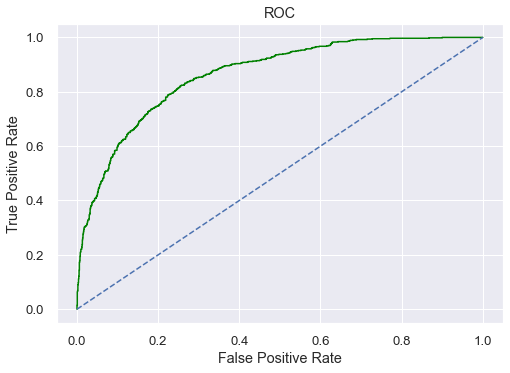

In [140]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [141]:
confusion_matrix(test_labels,ytest_predict)

array([[522,  66],
       [117, 154]], dtype=int64)

In [142]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7869615832363213

In [143]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       588
           1       0.70      0.57      0.63       271

    accuracy                           0.79       859
   macro avg       0.76      0.73      0.74       859
weighted avg       0.78      0.79      0.78       859



In [144]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.7
rf_test_recall  0.57
rf_test_f1  0.63


Area under Curve is 0.8099160328337978


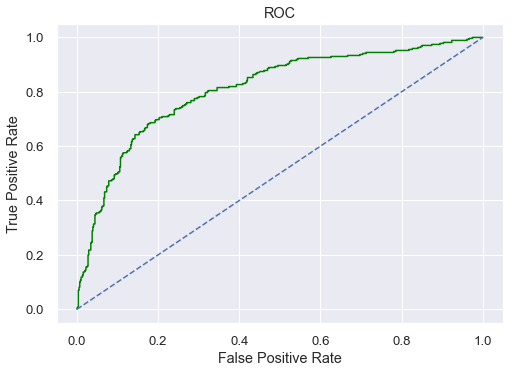

In [145]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [146]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.414228
Sales         0.246875
Duration      0.107368
Product_Name  0.084780
Age           0.071104
Commision     0.060622
Destination   0.013229
Channel       0.001658
Type          0.000137


# Random Forest Conclusion

<b>Train Data:</b>  
    AUC: 86%        
    Accuracy: 80%           
    Precision: 74%        
    f1-Score: 65%       
            
<b>Test Data:</b>      
    AUC: 81%      
    Accuracy: 79%          
    Precision: 70%       
    f1-Score: 63%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

# Building a Neural Network Classifier

In [147]:
param_grid = {
    'hidden_layer_sizes': [100], # 50, 200
    'max_iter': [2500], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 5)

In [148]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [149]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)

## Predicting the Training and Testing data

In [150]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## NN Model Performance Evaluation on Training data

In [151]:
confusion_matrix(train_labels,ytrain_predict)

array([[1163,  196],
       [ 280,  363]], dtype=int64)

In [152]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7622377622377622

In [153]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1359
           1       0.65      0.56      0.60       643

    accuracy                           0.76      2002
   macro avg       0.73      0.71      0.72      2002
weighted avg       0.76      0.76      0.76      2002



In [154]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.65
nn_train_recall  0.56
nn_train_f1  0.6


Area under Curve is 0.7920464571767961


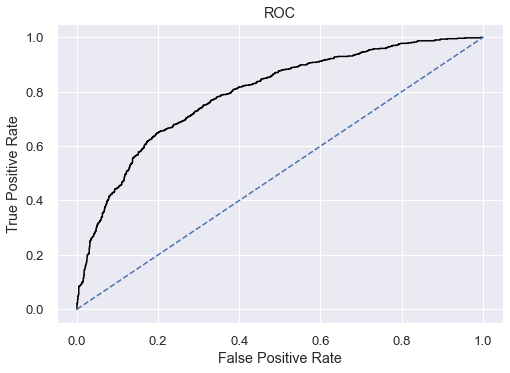

In [155]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

## NN Model Performance Evaluation on Test data

In [156]:
confusion_matrix(test_labels,ytest_predict)

array([[510,  78],
       [118, 153]], dtype=int64)

In [157]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7718277066356228

In [158]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       588
           1       0.66      0.56      0.61       271

    accuracy                           0.77       859
   macro avg       0.74      0.72      0.72       859
weighted avg       0.76      0.77      0.77       859



In [159]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.66
nn_test_recall  0.56
nn_test_f1  0.61


Area under Curve is 0.7911175540326832


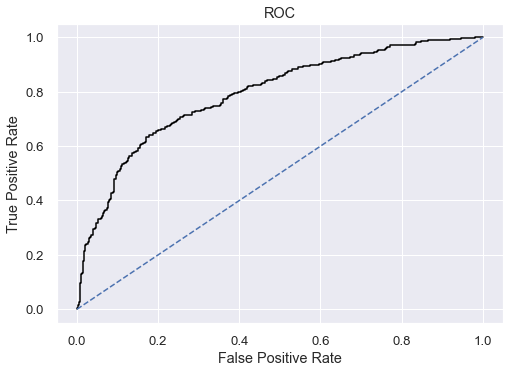

In [160]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [161]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)>

# Neural Network Conclusion

<b>Train Data:</b>  
    AUC: 79%        
    Accuracy: 76%          
    Precision: 65%        
    f1-Score: 60%     
            
<b>Test Data:</b>      
    AUC: 79%      
    Accuracy: 77%        
    Precision: 66%       
    f1-Score: 61%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

# Final Conclusion

## Comparison of the performance metrics from the 3 models

In [162]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.76,0.78,0.80,0.79,0.76,0.77
AUC,0.81,0.79,0.86,0.81,0.79,0.79
Recall,0.58,0.60,0.59,0.57,0.56,0.56
Precision,0.65,0.68,0.74,0.70,0.65,0.66
F1 Score,0.61,0.63,0.65,0.63,0.60,0.61


## ROC Curve for the 3 models on the Training data

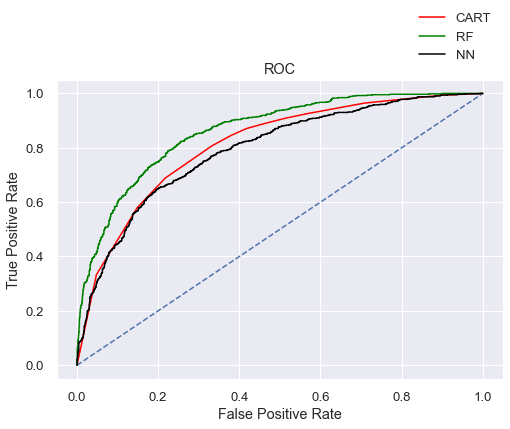

In [163]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC Curve for the 3 models on the Test data

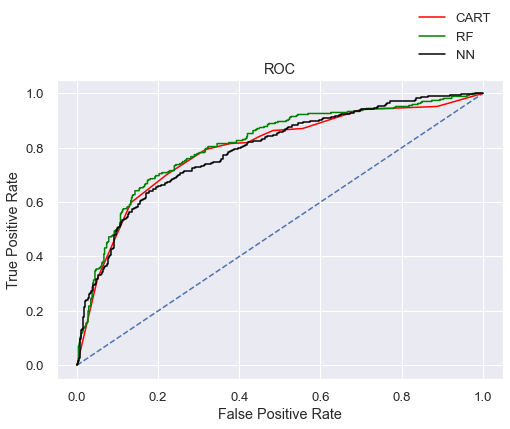

In [164]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model